**DATA CLEANING AND PREPARATION**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

**CUSTOMER DATA**

In [2]:
customer_data = pd.read_csv(r"C:\Users\jagadesh\Documents\Python Scripts\dataspark eda project\rawdataset\Customers.csv" , encoding = "latin1")


In [3]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [4]:
#checking data types
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [5]:
#converting to datetime and then format to 'YY/MM/DD'
customer_data['Birthday'] = pd.to_datetime(customer_data['Birthday'], format = "%m/%d/%Y", errors = 'coerce').dt.date
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [6]:
#checking for missing values
customer_data.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [7]:
#dropping missing values
customer_data.dropna(inplace = True)

In [8]:
#droping useless columns
customer_data.drop(["State Code","Zip Code"], axis=1, inplace= True)

In [9]:
#check for duplicated values
customer_data.duplicated().sum()

0

In [10]:
#verifying again for missing values
customer_data.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State          0
Country        0
Continent      0
Birthday       0
dtype: int64

In [11]:
customer_data

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,Texas,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,Virginia,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,North Carolina,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,California,United States,North America,1937-10-12


Text(0.5, 1.0, 'counts as per country')

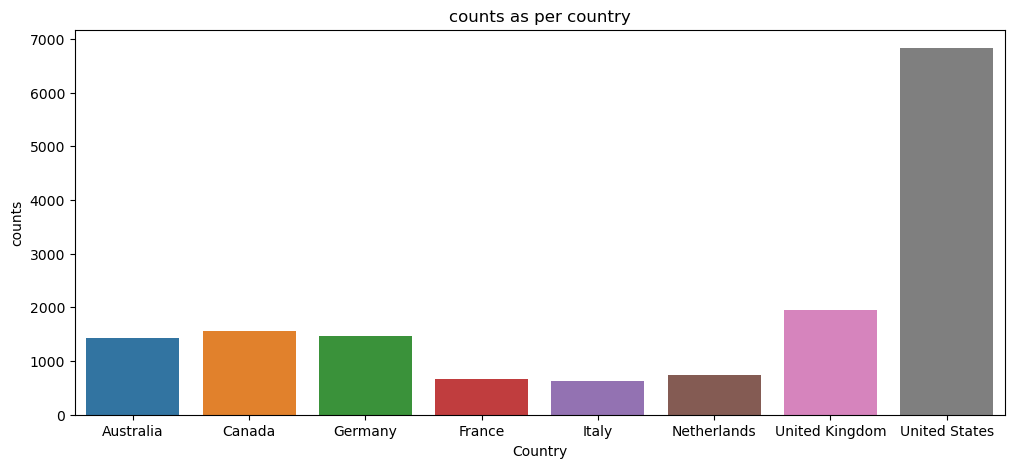

In [12]:
#visualize the country
plt.figure(figsize=(12,5))
sns.countplot(x= customer_data["Country"], data=customer_data)
plt.xlabel("Country")
plt.ylabel("counts")
plt.title("counts as per country")

Text(0.5, 1.0, 'counts as per Gender')

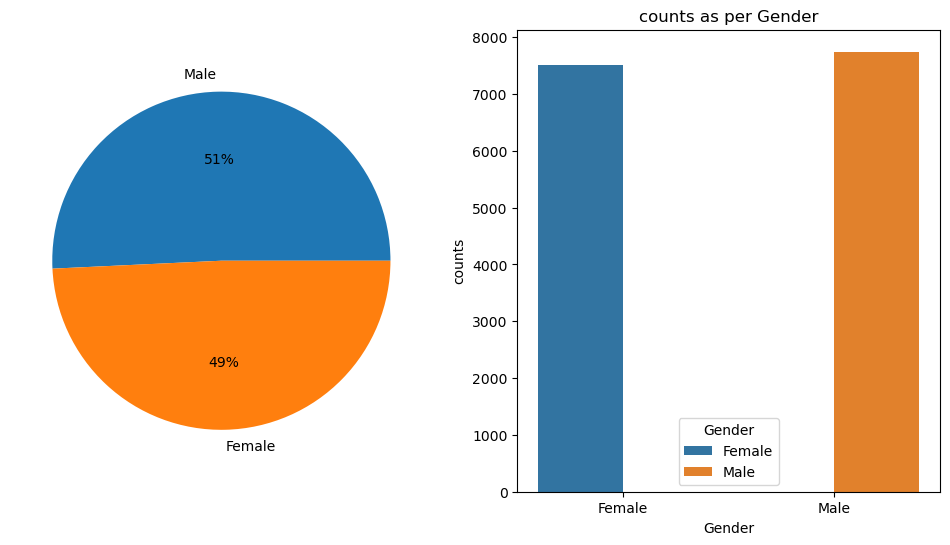

In [13]:
#visualize the gender details
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(customer_data["Gender"].value_counts(), autopct= "%1.0f%%", labels= ["Male","Female"])
plt.subplot(1,2,2)
sns.countplot(x= customer_data["Gender"],data=customer_data, hue="Gender")
plt.xlabel("Gender")
plt.ylabel("counts")
plt.title("counts as per Gender")

**SALES DATA**

In [14]:
sales_data = pd.read_csv(r"C:\Users\jagadesh\Documents\Python Scripts\dataspark eda project\rawdataset\Sales.csv")
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [15]:
#GET INFORMATION ABOUT THE DATAFRAMES,DATA TYPES 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [16]:
#GENERATE DESCRIPTIVE STATISTICS FOR NUMERICAL DATA
sales_data.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [17]:
#CHECKING FOR MISSING VALUES
sales_data.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [18]:
##fill the missing values,instead of filling zero filling random date
sales_data["Delivery Date"]=sales_data["Delivery Date"].fillna("01/01/1900")
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,01/01/1900,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,01/01/1900,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [19]:
#convert 'Order Date' column to datetime
sales_data["Order Date"]=pd.to_datetime(sales_data["Order Date"])
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,01/01/1900,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,01/01/1900,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2/23/2021,331277,0,1717,2,CAD


In [20]:
sales_data['Delivery Date'] = pd.to_datetime(sales_data['Delivery Date'])
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,1900-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1900-01-01,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD


In [21]:
sales_data["Delivery Date"]=sales_data["Delivery Date"].dt.date
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,1900-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1900-01-01,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD


In [22]:
#check for duplicated values
sales_data.duplicated().sum()

0

C:\Users\jagadesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


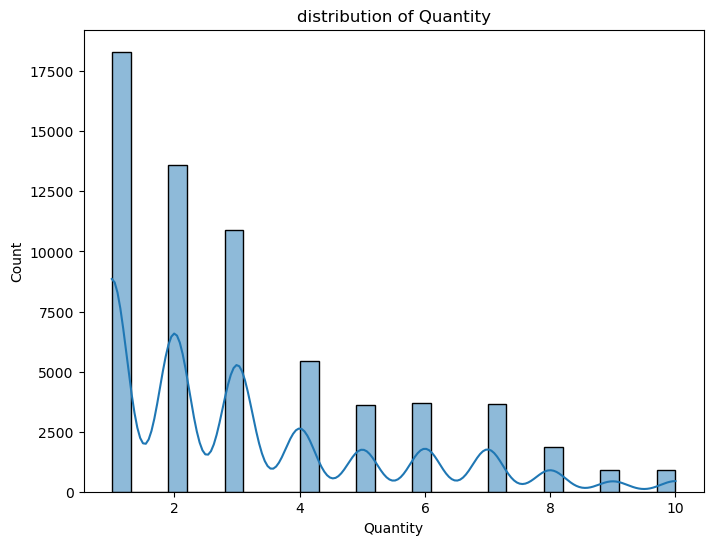

C:\Users\jagadesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


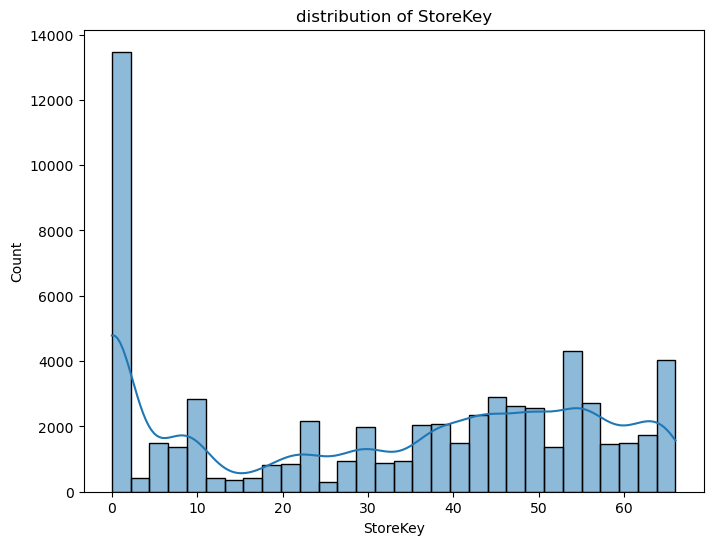

C:\Users\jagadesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


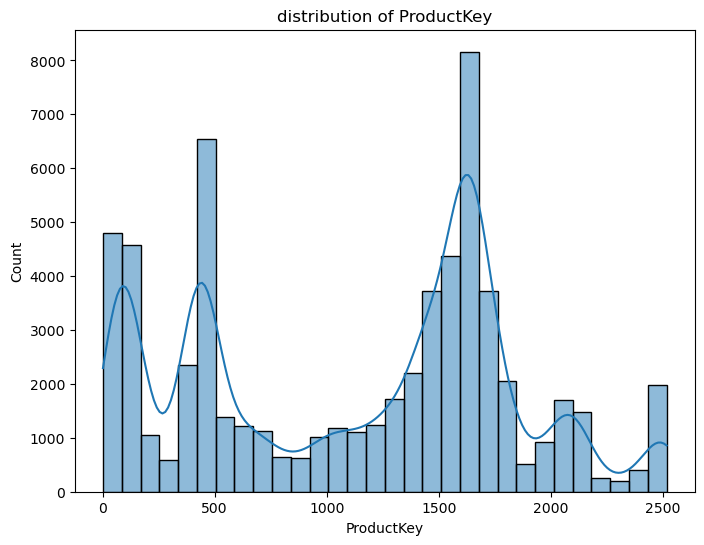

C:\Users\jagadesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


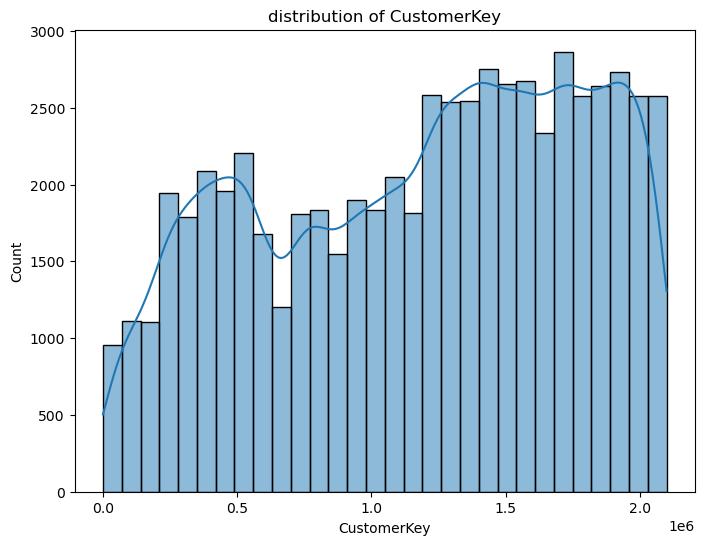

In [23]:
#explore the distribution of numerical features
numerical_features = ["Quantity","StoreKey","ProductKey","CustomerKey"]
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.histplot(sales_data[feature], bins=30, kde=True)
    plt.title(f"distribution of {feature}")
    plt.show()

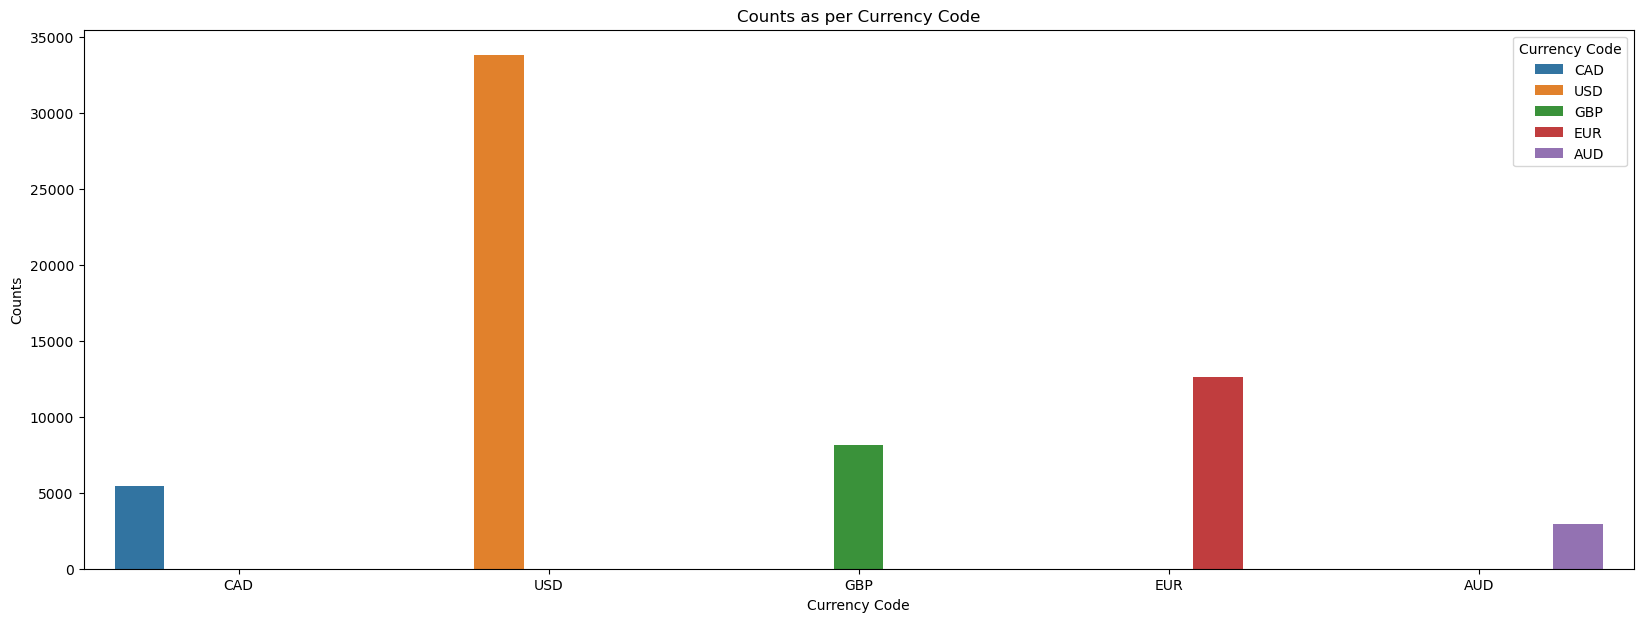

In [24]:
#visualize Currency Code
plt.figure(figsize=(20,7))
sns.countplot(x=sales_data["Currency Code"], data=sales_data , hue="Currency Code")
plt.xlabel("Currency Code")
plt.ylabel("Counts")
plt.title("Counts as per Currency Code")
plt.show()

**PRODUCT DATA**


In [25]:
products_data=pd.read_csv(r"C:\Users\jagadesh\Documents\Python Scripts\dataspark eda project\rawdataset\Products.csv")
products_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [26]:
#get information about dataframe and datatypes
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [27]:
#get descriptive statistics for numerical columns
products_data.describe()

,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


In [28]:
#check for missing values 
products_data.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [29]:
#data type conversion
#convert columns to appropriate data types if needed
#convert "Unit Cost USD","Unit Price USD" to numeric
products_data["Unit Cost USD"]=products_data["Unit Cost USD"].str.replace("$","").str.replace(",","").str.strip().astype(float)
products_data["Unit Price USD"]=products_data["Unit Price USD"].str.replace("$","").str.replace(",","").str.strip().astype(float)
products_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [30]:
#check for duplicate rows and remove them if neccesary
products_data.duplicated().sum()


0

In [31]:
#remove SubcategoryKey
products_data.drop(["SubcategoryKey"], axis=1, inplace=True)

In [32]:
products_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,Cell phones Accessories,5,Cell phones


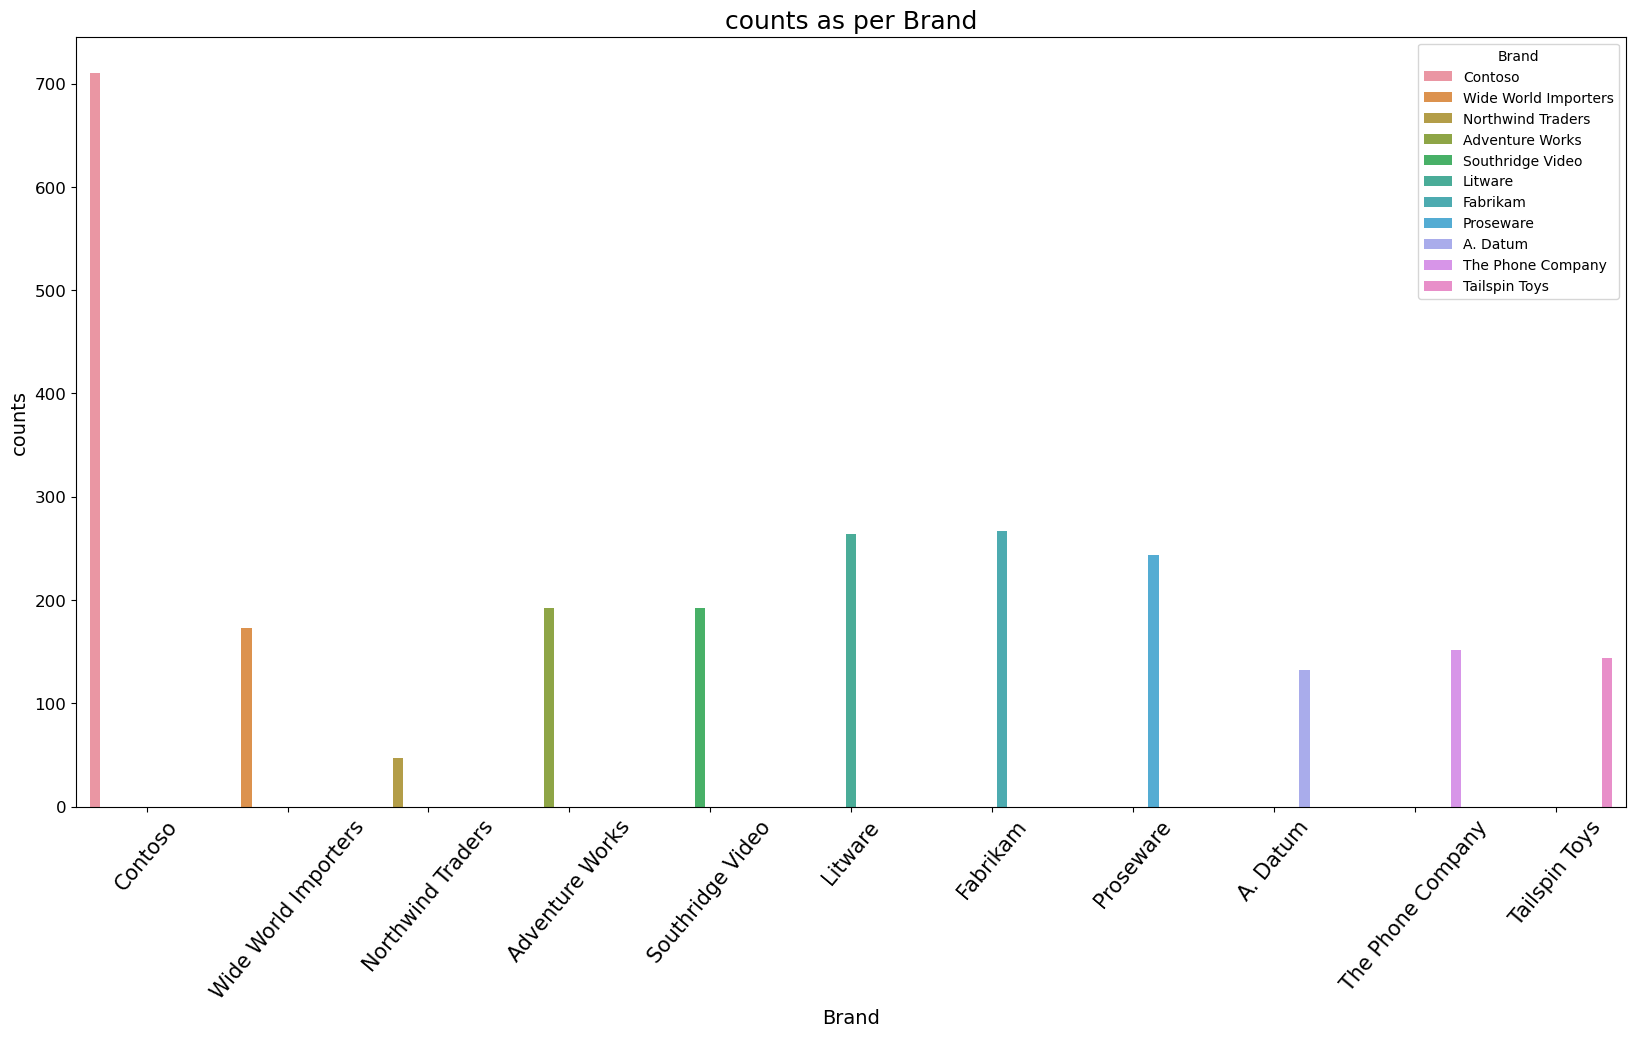

In [33]:
#visualize the brand 
plt.figure(figsize=(20,10))
sns.countplot(x=products_data["Brand"],data=products_data,hue="Brand")
plt.xlabel("Brand", fontsize=14)
plt.ylabel("counts", fontsize=14)
plt.title("counts as per Brand", fontsize=18)
plt.xticks(fontsize=15, rotation=50)
plt.yticks(fontsize=12)
plt.show()

Text(0.5, 1.0, 'Counts as per Category')

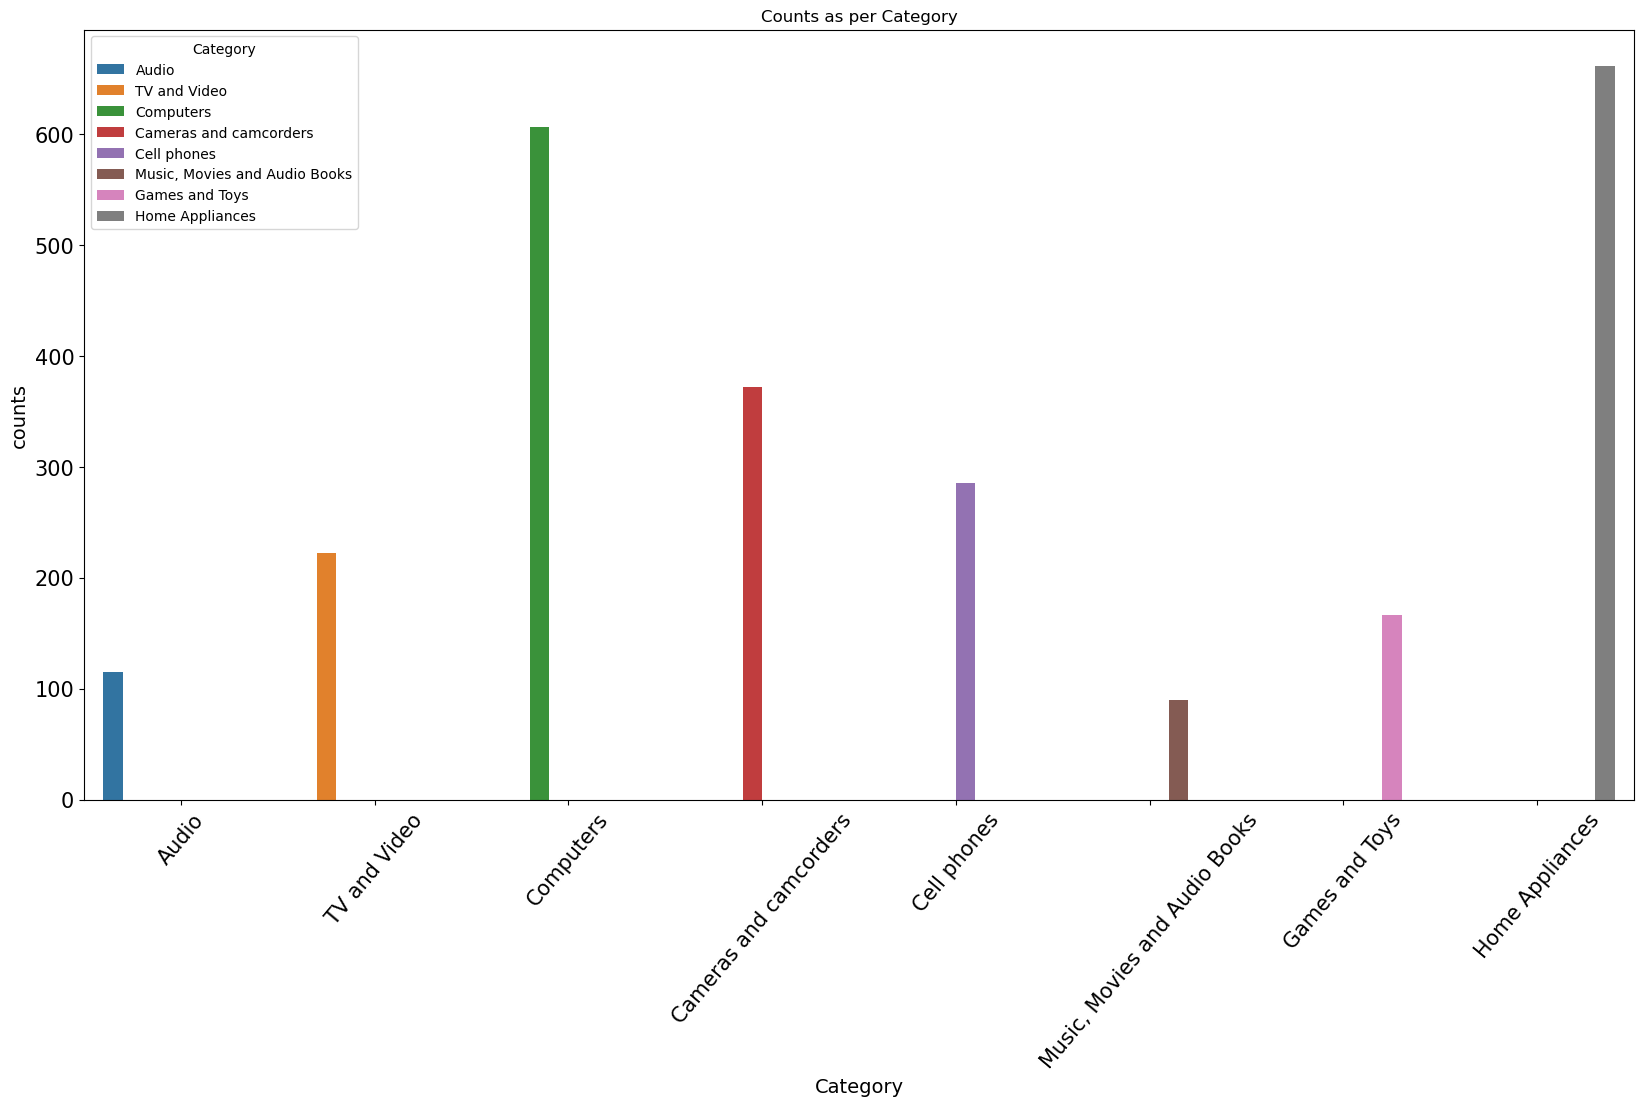

In [34]:
#visualize the Category
plt.figure(figsize=(20,10))
sns.countplot(x=products_data["Category"], data=products_data, hue="Category")
plt.xlabel("Category", fontsize=14)
plt.ylabel("counts", fontsize=14)
plt.xticks(fontsize=15, rotation=50)
plt.yticks(fontsize=15)
plt.title("Counts as per Category")

**STORES DATA**

In [35]:
stores_data= pd.read_csv(r"C:\Users\jagadesh\Documents\Python Scripts\dataspark eda project\rawdataset\Stores.csv")
stores_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [36]:
#get information about dataframe and datatypes
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [37]:
#get descriptive statistics for numerical values
stores_data.describe()

,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


In [38]:
#check for missing values
stores_data.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [39]:
#fill the missing value
stores_data["Square Meters"]=stores_data["Square Meters"].fillna(0)

In [40]:
#verifying again for missing values
stores_data.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [41]:
#convert "Open Date" to date format
stores_data["Open Date"]=pd.to_datetime(stores_data["Open Date"])
stores_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [42]:
stores_data["Open Date"]=stores_data["Open Date"].dt.date
stores_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [43]:
#check for any duplicates then drop them (if any)
stores_data.duplicated().sum()

0

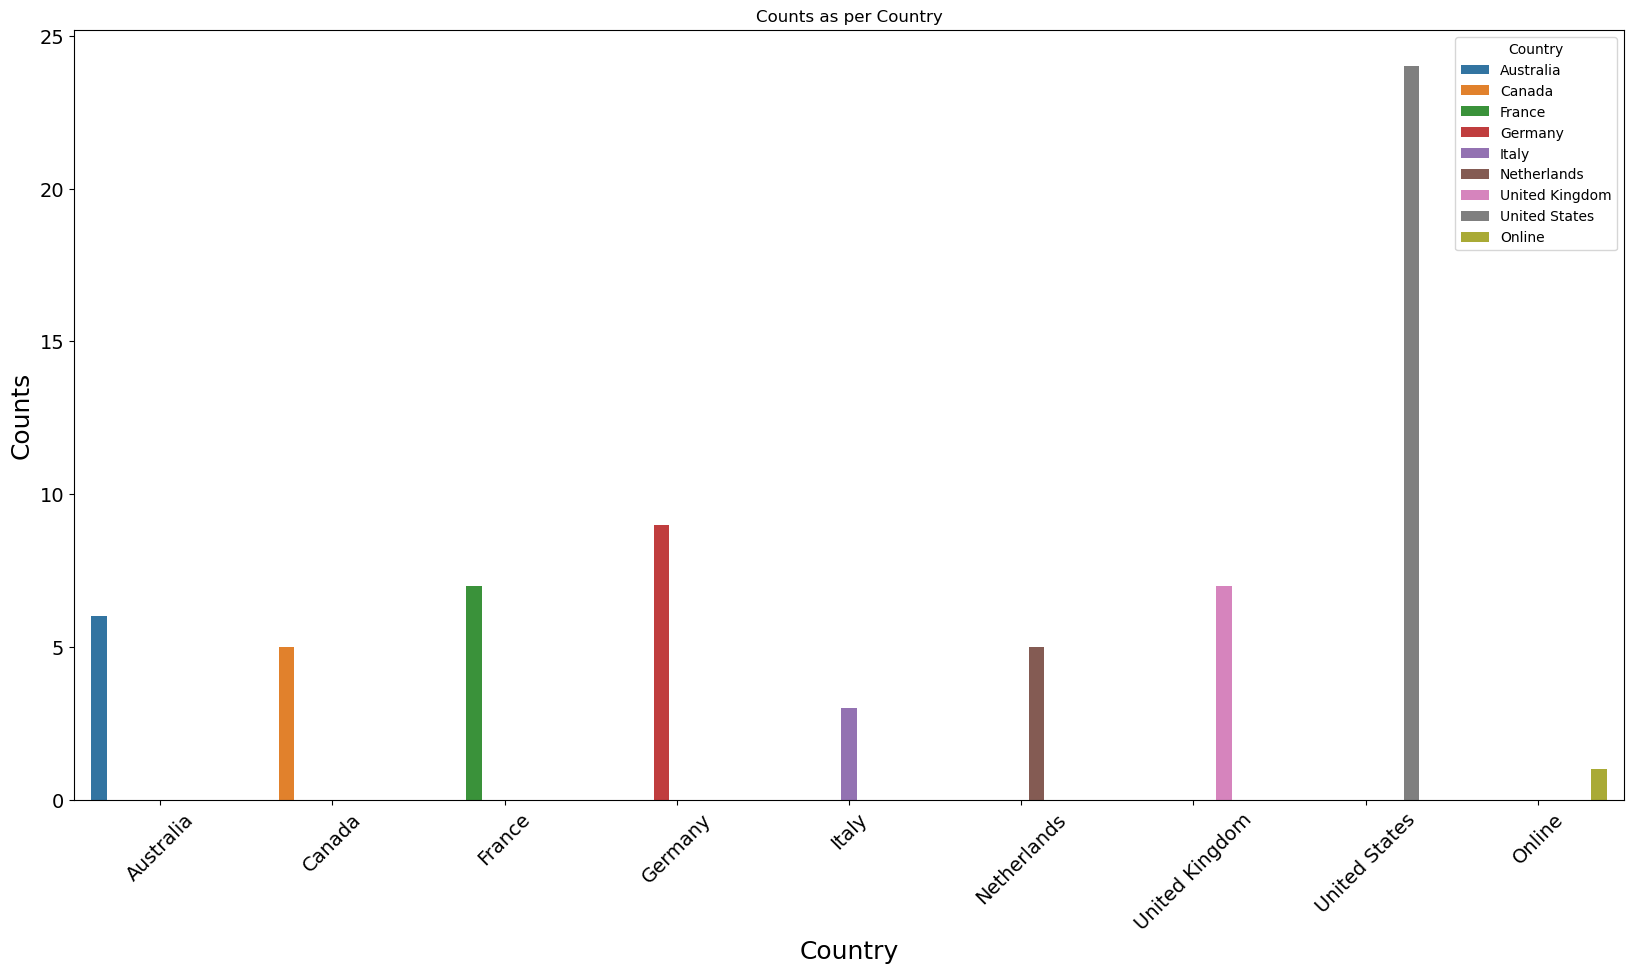

In [44]:
#visualize country counts
plt.figure(figsize=(20,10))
sns.countplot(x=stores_data["Country"], data=stores_data, hue="Country")
plt.xlabel("Country", fontsize=18)
plt.ylabel("Counts", fontsize=18)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.title("Counts as per Country")
plt.show()

**EXCHANGE RATES**

In [45]:
exchange_rates_data= pd.read_csv(r"C:\Users\jagadesh\Documents\Python Scripts\dataspark eda project\rawdataset\Exchange_Rates.csv")
exchange_rates_data

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [46]:
#get information about dataframe and dtypes
exchange_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [47]:
#get descriptive statistics for numerical columns
exchange_rates_data.describe()

,Exchange
count,11215.000000
mean,1.061682
std,0.245519
min,0.628500
25%,0.857800
50%,1.000000
75%,1.311900
max,1.725300


In [48]:
#check for null values
exchange_rates_data.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [49]:
#convert "Open Date" to date format
exchange_rates_data["Date"]=pd.to_datetime(exchange_rates_data["Date"])

In [50]:
exchange_rates_data["Date"]=exchange_rates_data["Date"].dt.date
exchange_rates_data

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


C:\Users\jagadesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


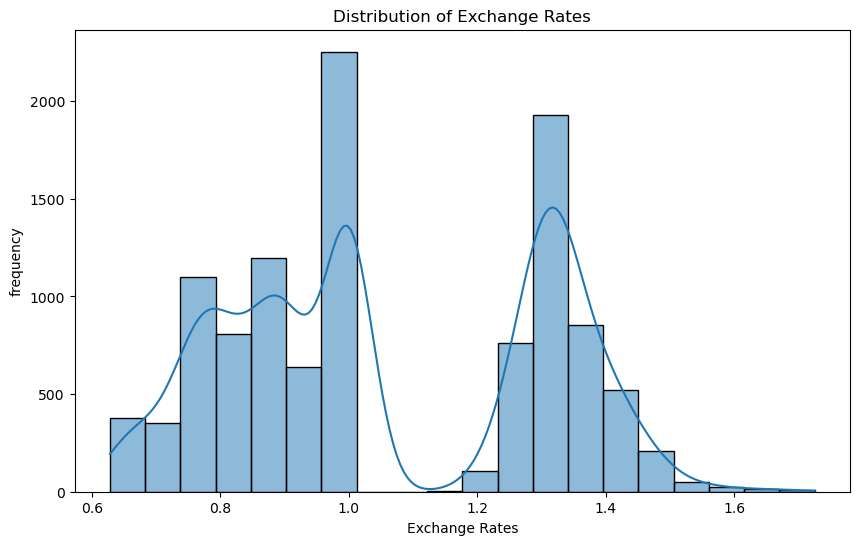

In [51]:
#Visualize the distribution of "Exchange" rates
plt.figure(figsize=(10,6))
sns.histplot(exchange_rates_data["Exchange"], bins=20, kde=True)
plt.xlabel("Exchange Rates")
plt.ylabel("frequency")
plt.title("Distribution of Exchange Rates")
plt.show()

C:\Users\jagadesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jagadesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


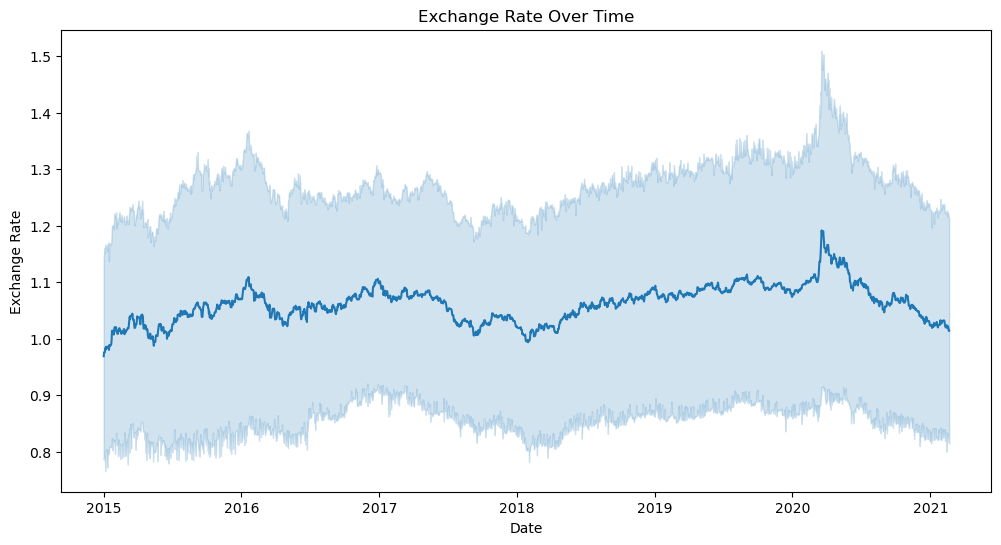

In [52]:
#analyse "Exchange Rates" over time
plt.figure(figsize=(12,6))
sns.lineplot(x="Date",y="Exchange", data=exchange_rates_data)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exchange Rate Over Time")
plt.show()

In [53]:
exchange_labels=exchange_rates_data["Currency"].value_counts().index

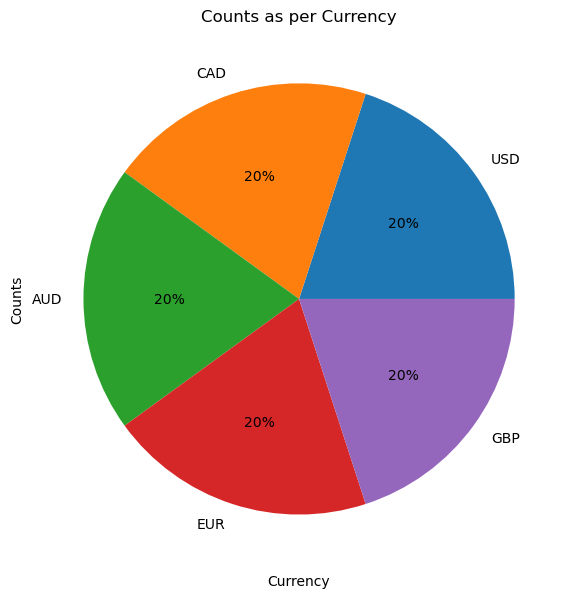

In [54]:
#visualize the currency details
plt.figure(figsize=(12,7))
plt.pie(exchange_rates_data["Currency"].value_counts(), autopct="%1.0f%%", labels=exchange_labels)
plt.xlabel("Currency")
plt.ylabel("Counts")
plt.title("Counts as per Currency")
plt.show()

In [55]:
#sql connection
my_db=pymysql.connect(host="127.0.0.1", user="root", password="1111")
my_cursor=my_db.cursor()
#create database if not exists
my_cursor.execute("CREATE DATABASE IF NOT EXISTS data_spark")
print("database 'data_spark' created successfully")

database 'data_spark' created successfully


In [56]:
#reconnect specifing the new database
my_db=pymysql.connect(host="127.0.0.1",user="root",password="1111",database="data_spark")
my_cursor=my_db.cursor()
print("connected to 'data_spark' database successfully")

connected to 'data_spark' database successfully


In [57]:
#function to reconnect
def reconnect():
    global my_db, my_cursor
    my_db=pymysql.connect(host="127.0.0.1", user="root", password="1111", database="data_spark")
    my_cursor=my_db.cursor()

In [58]:
#create customers table
my_cursor.execute(''' CREATE TABLE IF NOT EXISTS customers(
                  Customerkey INT(64),
                  Gender VARCHAR(255),
                  Name VARCHAR(255),
                  City VARCHAR(255),
                  State VARCHAR(255),
                  Country VARCHAR(255),
                  Continent VARCHAR(255),
                  Birthday DATE
                  )''')
print("customers table created successfully")

customers table created successfully


In [59]:
#insert values into customer table
insert_query='''INSERT INTO customers(
                CustomerKey,
                Gender,
                Name,
                City,
                State,
                Country,
                Continent,
                Birthday)
                VALUES(%s,%s,%s,%s,%s,%s,%s,%s)'''
data=customer_data.values.tolist()
batch_size=1000
for i in range(0, len(data), batch_size):
    batch_data=data[i:i+batch_size]
    try:
        #performing batch insert with execute many
        my_cursor.executemany(insert_query, batch_data)
        my_db.commit()
    except pymysql.MySQLError as err:
        if err.args[0]==2006 or err.args[0]==2013:   #2006:CR_SERVER_LOST, 2013:CR_SERVER_GONE ERROR
            print(f"Error{err}: server connection lost or gone. Reconnecting...")
            reconnect()
            #retry batch insert after reconnecting
            my_cursor.executemany(insert_query, batch_data)
            my_db.commit()
        else:
            print("An Error occurred:{err}")
print("inserted successfully")

inserted successfully


In [60]:
#create sales table
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales(
                     Order_Number INT(64),
                     Line_Item INT(64),
                     Order_Date DATE,
                     Delivery_Date DATE,
                     CustomerKey INT(64),
                     StoreKey INT(64),
                     ProductKey INT(64),
                     Quantity INT(64),
                     Currency_Code VARCHAR(255)
                     )''')
print("sales table created successfully")

sales table created successfully


In [61]:
#insert values into sales table
insert_query='''INSERT INTO sales(
                Order_Number,
                Line_Item,
                Order_Date,
                Delivery_Date,
                CustomerKey,
                StoreKey,
                ProductKey,
                Quantity,
                Currency_Code)
                VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s)'''
data=sales_data.values.tolist()
batch_size=1000

for i in range(0, len(data), batch_size):
    batch_data=data[i:i+batch_size]
    try:
        #performing batch insert with executemany
        my_cursor.executemany(insert_query, batch_data)
        my_db.commit()
    except pymysql.MySQLError as err:
        if err.args[0]==2006 or err.args[0]==2013:                  #2006: CR_SERVER_LOST, 2013: CR_SERVER_GONE_ERROR
            print(f"Error {err}: server connection lost or gone. Reconnecting...")
            reconnect()
            #retry batch insert after reconnecting
            my_cursor.executemany(insert_query, batch_data)
            my_db.commit()
        else:
            print(f"An Error Occuered:{err}")
print("Inserted Successfully")

Inserted Successfully


In [62]:
#create products table
my_cursor.execute('''CREATE TABLE IF NOT EXISTS products(
                     ProductKey INT(64),
                     Product_Name VARCHAR(255),
                     Brand VARCHAR(255),
                     Color VARCHAR(255),
                     Unit_Cost_USD FLOAT,
                     Unit_Price_USD FLOAT,
                     Subcategory VARCHAR(255),
                     CategoryKey INT(64),
                     Category VARCHAR(255)
                     )''')
print("products table created successfully")

products table created successfully


In [63]:
#insert values into products table
insert_query='''INSERT INTO products(
                ProductKey,
                Product_Name,
                Brand,
                Color,
                Unit_Cost_USD,
                Unit_Price_USD,
                Subcategory,
                CategoryKey,
                Category)
                VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s)'''
data=products_data.values.tolist()
batch_size=1000
for i in range(0, len(data), batch_size):
    batch_data=data[i:i+batch_size]
    try:
        #performing batch insert with executemany
        my_cursor.executemany(insert_query, batch_data)
        my_db.commit()
    except pymysql.MySQLError as err:
        if err.args[0]==2006 or err.args[0]==2013:    #2006:CR_SERVER_LOST,2013:CR_SERVER_GONE ERROR
            print(f"Error: {err}: Server connection lost or gone. Reconnecting...")
            reconnect()
            #retry batch insert after reconnecting
            my_cursor.executemany(insert_query, batch_data)
            my_db.commit()
        else:
            print("An Error Occured: {err}")
print("Data inserted successfully into products table")

Data inserted successfully into products table


In [64]:
#stores table creation
my_cursor.execute(''' CREATE TABLE IF NOT EXISTS stores(
                      StoreKey INT(64),
                      Country VARCHAR(255),
                      State VARCHAR(255),
                      Square_Meters FLOAT,
                      Open_Date DATE
                      )''')
print("stores table created successfully")

stores table created successfully


In [65]:
#insert values into stores table
insert_query='''INSERT INTO stores(
                StoreKey,
                Country,
                State,
                Square_Meters,
                Open_Date)
                VALUES(%s,%s,%s,%s,%s)'''
data=stores_data.values.tolist()
my_cursor.executemany(insert_query, data)
my_db.commit()
print("data insertes into stores table successfully")

data insertes into stores table successfully


In [66]:
#Exchange Rates table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_rates(
                    Date DATE,
                    Currency_Code VARCHAR(255),
                    Exchange FLOAT
                    )''')
print("exchange_rates table created successfully")

exchange_rates table created successfully


In [67]:
#insert values into exchange_rates table
insert_query='''INSERT INTO exchange_rates(
                Date,
                Currency_Code,
                Exchange)
                VALUES(%s,%s,%s)'''
data=exchange_rates_data.values.tolist()
batch_size=1000
for i in range(0, len(data), batch_size):
    batch_data=data[i:i+batch_size]
    try:
        #performing batch insert with executemany
        my_cursor.executemany(insert_query, batch_data)
        my_db.commit()
    except pymysql.MySQLError as err:
        if err.args[0]==2006 or err.args[0]==2013:      #2006:CR_SERVER_LOST, 2013:CR_SERVER_GONE ERROR
            print(f"Error: {err}: Server connection lost or gone, Reconnecting...")
            reconnect()
            #try again for batch insert after reconnecting
            my_cursor.executemany(insert_query, batch_data)
            my_db.commit()
        else:
            print(f"An Error Occured: {err}")
print("Data inserted successfully into exchange_rates table")

Data inserted successfully into exchange_rates table
